In [1]:
import pandas as pd
import numpy as np
import os 
import statistics 
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [2]:
current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')


In [4]:
print(updatedchoicedata)

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    595727bd7c76640001aa8f6e                 0                1.0   
4    595727bd7c76640001aa8f6e                 1                1.0   
..                        ...               ...                ...   
202  641361334c91a0c6ff4c5b79                 1                1.0   
203  641361334c91a0c6ff4c5b79                 2                1.0   
204  641a3df3c874807a1a8734bc                 0                1.0   
205  641a3df3c874807a1a8734bc                 1                1.0   
206  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  
0              4.0          5.0             5.0  0.833333     -0.5           1

In [5]:
anovachoice = pg.rm_anova(data=updatedchoicedata, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [6]:
print(anovachoice)

             Source        SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.082809    2  0.041405  1.591366  0.207471   0.210256   
1             Error  3.486447  134  0.026018       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.002409  0.878738      False  0.862005  0.007444  
1       NaN       NaN        NaN       NaN       NaN  


In [7]:
anovasalience = pg.rm_anova(data=updatedchoicedata, dv='salience_mean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovasalience)

             Source         SS   DF         MS          F         p-unc  \
0  condition_recode  40.816176    2  20.408088  42.496705  5.094966e-15   
1             Error  64.350490  134   0.480228        NaN           NaN   

      p-GG-corr       ng2       eps sphericity   W-spher   p-spher  
0  6.460215e-15  0.177868  0.991826       True  0.991759  0.761036  
1           NaN       NaN       NaN        NaN       NaN       NaN  


In [8]:
anovastress = pg.rm_anova(data=updatedchoicedata, dv='recoded_stress', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovastress)

             Source          SS   DF        MS         F    p-unc  p-GG-corr  \
0  condition_recode   18.154412    2  9.077206  9.489435  0.00014   0.000159   
1             Error  128.178922  134  0.956559       NaN      NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.019772  0.978825       True  0.978367  0.485907  
1       NaN       NaN        NaN       NaN       NaN  


In [9]:
rej = updatedchoicedata.loc[updatedchoicedata['condition_recode']==1].reset_index(drop=True)
acc = updatedchoicedata.loc[updatedchoicedata['condition_recode']==2].reset_index(drop=True)
neu = updatedchoicedata.loc[updatedchoicedata['condition_recode']==0].reset_index(drop=True)


In [10]:
rej_accstressttest = ttest(rej['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d     BF10  power
T-test -4.28   68        less    0.0  [-inf, -0.48]     0.37  672.417   0.92


In [11]:
rej_neustressttest = ttest(rej['recoded_stress'], neu['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_neustressttest)

           T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -2.59   68        less   0.01  [-inf, -0.15]     0.19  5.749   0.48


In [12]:
neu_accstressttest = ttest(neu['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(neu_accstressttest)

          T  dof alternative  p-val          CI95%  cohen-d BF10  power
T-test -2.2   68        less   0.02  [-inf, -0.08]     0.17  2.5   0.41


In [13]:
rej_accsaliencettest = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(rej_accsaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d       BF10  power
T-test -9.37   68        less    0.0  [-inf, -0.92]     1.23  2.052e+11    1.0


In [14]:
rej_neusaliencettest = ttest(rej['salience_mean'], neu['salience_mean'], paired=True, alternative='less').round(2)
print(rej_neusaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d      BF10  power
T-test -4.78   68        less    0.0  [-inf, -0.35]     0.56  3550.867    1.0


In [15]:
neu_accsaliencettest = ttest(neu['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(neu_accsaliencettest)

          T  dof alternative  p-val          CI95%  cohen-d      BF10  power
T-test -4.7   68        less    0.0  [-inf, -0.37]     0.57  2757.302    1.0


In [16]:
print(rej)

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
64  63eac31811a6da58d4f32d76                 1                1.0   
65  63fac97f0d4e8f6bfd753d90                 1                1.0   
66  64023a98627b1116180dff0b                 1                1.0   
67  641361334c91a0c6ff4c5b79                 1                1.0   
68  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  
0             1.5          4.5             4.5  1.000000     -0.5           1  
1          

In [17]:
len(rej)

69

In [18]:
mostaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==1].reset_index(drop=True)
leastaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==0].reset_index(drop=True)

In [19]:
print(len(mostaffectedpps))

123


In [20]:
mostaffectedanovachoice = pg.rm_anova(data=mostaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [21]:
print(mostaffectedanovachoice)

             Source        SS  DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.025705   2  0.012853  0.408484  0.666071   0.650227   
1             Error  2.454188  78  0.031464       NaN       NaN        NaN   

        ng2      eps sphericity   W-spher   p-spher  
0  0.001398  0.92476       True  0.918638  0.199408  
1       NaN      NaN        NaN       NaN       NaN  


In [22]:
leastaffectedanovachoice = pg.rm_anova(data=leastaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [23]:
print(leastaffectedanovachoice)

             Source        SS  DF        MS        F     p-unc  p-GG-corr  \
0  condition_recode  0.069120   2  0.034560  1.82921  0.170348    0.18321   
1             Error  1.020243  54  0.018893      NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.004682  0.679211      False  0.527704  0.000246  
1       NaN       NaN        NaN       NaN       NaN  


In [24]:
#proportion of self-choice in neutral condition
rejchoice_mean = rej['choice'].mean()
rejchoice_std = rej['choice'].std()
print('rejchoice_mean')
print(rejchoice_mean)
print('rejchoice_std')
print(rejchoice_std)

rejchoice_mean
0.42863416776460256
rejchoice_std
0.41053453482829694


In [25]:
accchoice_mean = acc['choice'].mean()
accchoice_std = acc['choice'].std()
print('accchoice_mean')
print(accchoice_mean)
print('accchoice_std')
print(accchoice_std)

accchoice_mean
0.38030303030303025
accchoice_std
0.3960757238732947


In [26]:
neuchoice_mean = neu['choice'].mean()
neuchoice_std = neu['choice'].std()
print('neuchoice_mean')
print(neuchoice_mean)
print('neuchoice_std')
print(neuchoice_std)

neuchoice_mean
0.39975845410628014
neuchoice_std
0.43139169788803955


In [44]:
aq = pd.read_csv('%s/scoring/aq.csv'%(current_dir))
brcs = pd.read_csv('%s/scoring/brcs.csv'%(current_dir))
erq = pd.read_csv('%s/scoring/erq.csv'%(current_dir))
ntbs = pd.read_csv('%s/scoring/ntbs.csv'%(current_dir))
scs = pd.read_csv('%s/scoring/scs.csv'%(current_dir))
srq = pd.read_csv('%s/scoring/srq.csv'%(current_dir))
pss = pd.read_csv('%s/scoring/pss.csv'%(current_dir))

In [51]:
print(aq)

0     24
1     33
2     32
3     11
4     21
      ..
63    16
64    30
65    30
66    10
67    20
Name: AQ, Length: 68, dtype: int64


In [47]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']

In [48]:
# prop_choicerej // aq
pyplot.scatter(rejchoice, aq['AQ'])
pyplot.show()
covariance = cov(rejchoice, aq['AQ'])
print(covariance)
corr, _ = pearsonr(rejchoice, aq['AQ'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, aq['AQ'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

KeyError: 'AQ'

ValueError: x and y must be the same size

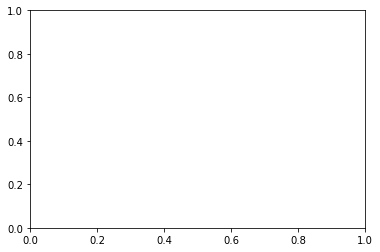

In [49]:
# prop_choicerej // ntbs
pyplot.scatter(rejchoice, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejchoice, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(rejchoice, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejchoice, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')